# ***Profiles and Levels*** 

## ***Profiles*** 

| **#** | **Profile**                  |
|------:|------------------------------|
| 1     | Low-Risk Client              |
| 2     | Mild-Risk Client             |
| 3     | Medium-Risk Client           |
| 4     | High-Risk Client             |
| 5     | Critical-Risk Client         |


## ***Levels and Linguistic Descriptors***

In [1]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn import metrics
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import plotly.graph_objects as go


html_code = """
<table border="1" cellspacing="0" cellpadding="5">
    <tr>
        <th>Variable</th>
        <th>Linguistic Descriptor</th>
        <th>Value Ranges</th>
    </tr>
    <tr>
        <td rowspan="3">Risk Default</td>
        <td>High</td>
        <td>0.01 - 0.55</td>
    </tr>
    <tr>
        <td>Medium</td>
        <td>0.4 - 0.80</td>
    </tr>
    <tr>
        <td>Low</td>
        <td>0.7 - 1</td>
    </tr>
    <tr>
        <td rowspan="5">Days in arrears</td>
        <td>Very High</td>
        <td>155 - 230</td>
    </tr>
    <tr>
        <td>High</td>
        <td>120 - 170</td>
    </tr>
    <tr>
        <td>Medium-High</td>
        <td>65 - 140</td>
    </tr>
    <tr>
        <td>Medium</td>
        <td>40 - 80</td>
    </tr>
    <tr>
        <td>Low</td>
        <td>0 - 50</td>
    </tr>
    <tr>
        <td rowspan="6">Total Balance CDC</td>
        <td>Very High</td>
        <td>27MM - 35MM</td>
    </tr>
    <tr>
        <td>High</td>
        <td>18.5MM - 30MM</td>
    </tr>
    <tr>
        <td>Medium</td>
        <td>8.5MM - 20MM</td>
    </tr>
    <tr>
        <td>Medium Low</td>
        <td>4.5MM - 10MM</td>
    </tr>
    <tr>
        <td>Low</td>
        <td>800K - 5MM</td>
    </tr>
    <tr>
        <td>Very Low</td>
        <td>0 - 1MM</td>
    </tr>
    <tr>
        <td rowspan="6">Total Balance TDC</td>
        <td>Very High</td>
        <td>9MM - 15MM</td>
    </tr>
    <tr>
        <td>High</td>
        <td>6.8MM - 10MM</td>
    </tr>
    <tr>
        <td>Medium</td>
        <td>4.3MM - 7.5MM</td>
    </tr>
    <tr>
        <td>Medium Low</td>
        <td>2MM - 5MM</td>
    </tr>
    <tr>
        <td>Low</td>
        <td>800K - 2.5MM</td>
    </tr>
    <tr>
        <td>Very Low</td>
        <td>0 - 1MM</td>
    </tr>
    <tr>
        <td rowspan="5">Overdue Balance</td>
        <td>Very High</td>
        <td>4.8MM - 35MM</td>
    </tr>
    <tr>
        <td>High</td>
        <td>1.8MM - 5MM</td>
    </tr>
    <tr>
        <td>Medium</td>
        <td>750K - 2MM</td>
    </tr>
    <tr>
        <td>Medium Low</td>
        <td>350K - 800K</td>
    </tr>
    <tr>
        <td>Low</td>
        <td>0 - 400K</td>
    </tr>
    <tr>
        <td rowspan="5">Overdue Installment</td>
        <td>Very High</td>
        <td>1.2MM - 6MM</td>
    </tr>
    <tr>
        <td>High</td>
        <td>750K - 1.25MM</td>
    </tr>
    <tr>
        <td>Medium</td>
        <td>450K - 800K</td>
    </tr>
    <tr>
        <td>Medium Low</td>
        <td>200K - 500K</td>
    </tr>
    <tr>
        <td>Low</td>
        <td>0 - 250K</td>
    </tr>
    <tr>
        <td rowspan="3">Priorization</td>
        <td>Low</td>
        <td>3 - 5</td>
    </tr>
    <tr>
        <td>Medium</td>
        <td>2 - 4</td>
    </tr>
    <tr>
        <td>High</td>
        <td>1 - 2</td>
    </tr>
    <tr>
        <td rowspan="3">Payments Habit</td>
        <td>Good</td>
        <td>3 - 6</td>
    </tr>
    <tr>
        <td>Regular</td>
        <td>1 - 4</td>
    </tr>
    <tr>
        <td>Bad</td>
        <td>0 - 2</td>
    </tr>
    <tr>
        <td rowspan="3">Total Contacts</td>
        <td>High</td>
        <td>5 - 10</td>
    </tr>
    <tr>
        <td>Medium</td>
        <td>2 - 6</td>
    </tr>
    <tr>
        <td>Low</td>
        <td>0 - 3</td>
    </tr>
    <tr>
        <td rowspan="3">Total Agreements</td>
        <td>High</td>
        <td>0 - 2</td>
    </tr>
    <tr>
        <td>Medium</td>
        <td>2 - 4</td>
    </tr>
    <tr>
        <td>Low</td>
        <td>3 - 6</td>
    </tr>
</table>

"""

display(HTML(html_code))


## ***Membership Functions***

### ***Risk Default***

/home/ssilvera/Escritorio/Proyectos/ProyectoDeGrado/.env/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


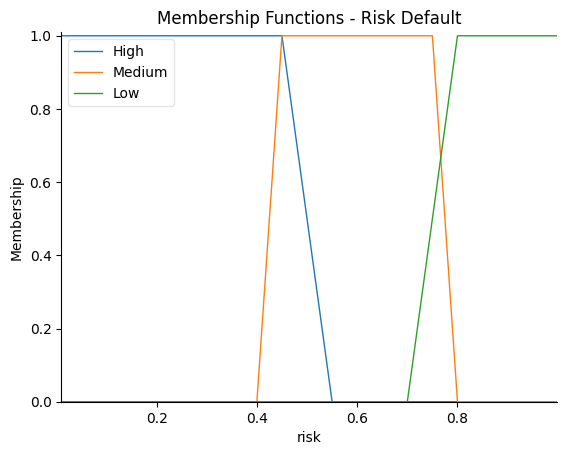

In [3]:
risk = ctrl.Antecedent(np.arange(0.01, 1, 0.001), 'risk')

risk["High"] = fuzz.trapmf(risk.universe, (0.01, 0.01, 0.45, 0.55)) 
risk["Medium"] = fuzz.trapmf(risk.universe, (0.4, 0.45, 0.75, 0.80))
risk["Low"] = fuzz.trapmf(risk.universe, (0.7, 0.80, 1, 1))

risk.view()
plt.title("Membership Functions - Risk Default")
plt.show()



$$
\mu_{\text{High}}(x) =
\begin{cases} 
0, & x < 0.01 \\
1, & 0.01 \leq x \leq 0.45 \\
\frac{0.55 - x}{0.10}, & 0.45 \leq x \leq 0.55 \\
0, & x > 0.55
\end{cases}\\
$$

$$
\mu_{\text{Medium}}(x) =
\begin{cases} 
0, & x < 0.4 \\
\frac{x - 0.4}{0.05}, & 0.4 \leq x \leq 0.45 \\
1, & 0.45 \leq x \leq 0.75 \\
\frac{0.80 - x}{0.05}, & 0.75 \leq x \leq 0.80 \\
0, & x > 0.80
\end{cases}\\
$$

$$
\mu_{\text{Low}}(x) =
\begin{cases} 
0, & x < 0.7 \\
\frac{x - 0.7}{0.10}, & 0.7 \leq x \leq 0.80 \\
1, & 0.80 \leq x \leq 1 \\
0, & x > 1
\end{cases}
$$


### ***Days in arrears***

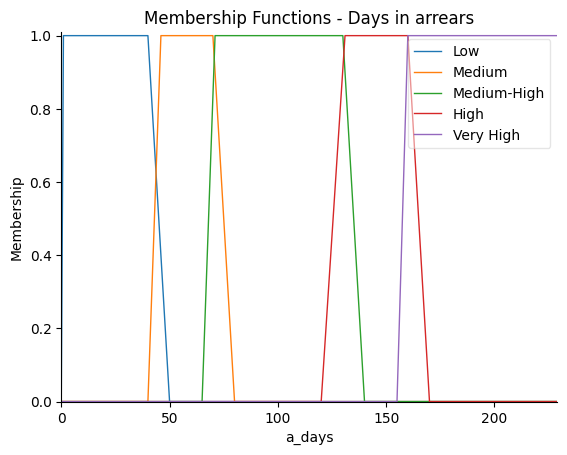

In [4]:
a_days = ctrl.Antecedent(np.arange(0, 230, 1), 'a_days')

a_days["Low"] = fuzz.trapmf(a_days.universe, [0, 1, 40, 50])
a_days["Medium"] = fuzz.trapmf(a_days.universe, [40, 46, 70, 80])
a_days["Medium-High"] = fuzz.trapmf(a_days.universe, [65, 71, 130, 140])
a_days["High"] = fuzz.trapmf(a_days.universe, [120, 131, 160, 170])
a_days["Very High"] = fuzz.trapmf(a_days.universe, [155, 160, 230, 230])

a_days.view()
plt.title("Membership Functions - Days in arrears")
plt.show()

$$
\mu_{\text{Low}}(x) =
\begin{cases}
  0, & x < 1 \\
  1, & 1 \leq x \leq 40 \\
  \frac{50 - x}{10}, & 40 \leq x \leq 50 \\
  0, & x > 50
\end{cases}
$$

$$
\mu_{\text{Medium}}(x) =
\begin{cases}
  0, & x < 40 \\
  \frac{x - 40}{6}, & 40 \leq x \leq 46 \\
  1, & 46 \leq x \leq 70 \\
  \frac{80 - x}{10}, & 70 \leq x \leq 80 \\
  0, & x > 80
\end{cases}
$$

$$
\mu_{\text{Medium-High}}(x) =
\begin{cases}
  0, & x < 65 \\
  \frac{x - 65}{6}, & 65 \leq x \leq 71 \\
  1, & 71 \leq x \leq 130 \\
  \frac{140 - x}{10}, & 130 \leq x \leq 140 \\
  0, & x > 140
\end{cases}
$$

$$
\mu_{\text{High}}(x) =
\begin{cases}
  0, & x < 120 \\
  \frac{x - 120}{11}, & 120 \leq x \leq 131 \\
  1, & 131 \leq x \leq 160 \\
  \frac{170 - x}{10}, & 160 \leq x \leq 170 \\
  0, & x > 170
\end{cases}
$$

$$
\mu_{\text{Very High}}(x) =
\begin{cases}
  0, & x < 155 \\
  \frac{x - 155}{10}, & 155 \leq x \leq 160 \\
  1, & 160 \leq x \leq 230 \\
  0, & x > 230
\end{cases}
$$

### ***Total Balance***

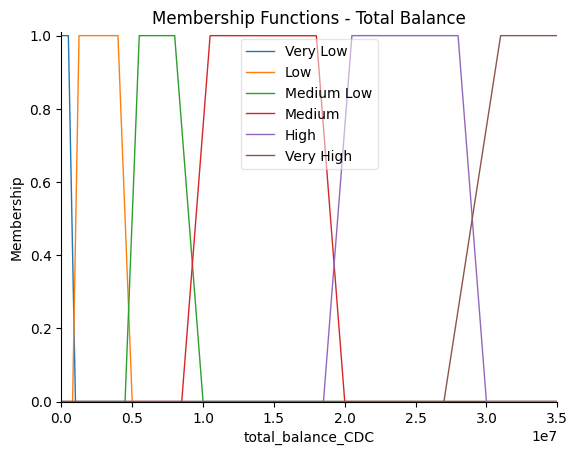

In [5]:
#total_balance_CDC = ctrl.Antecedent(np.linspace(0, 350_000_000, 5000), "total_balance_CDC")
total_balance_CDC = ctrl.Antecedent(np.linspace(0, 35_000_000, 5000), "total_balance_CDC")

total_balance_CDC["Very Low"] = fuzz.trapmf(total_balance_CDC.universe, [0, 0, 500_000, 1_000_000])
total_balance_CDC["Low"] = fuzz.trapmf(total_balance_CDC.universe, [800_000, 1_250_000, 4_000_000, 5_000_000])
total_balance_CDC["Medium Low"] = fuzz.trapmf(total_balance_CDC.universe, [4_500_000, 5_500_000, 8_000_000, 10_000_000])
total_balance_CDC["Medium"] = fuzz.trapmf(total_balance_CDC.universe, [8_500_000, 10_500_000, 18_000_000, 20_000_000])
total_balance_CDC["High"] = fuzz.trapmf(total_balance_CDC.universe, [18_500_000, 20_500_000, 28_000_000, 30_000_000])
#total_balance_CDC["Very High"] = fuzz.trapmf(total_balance_CDC.universe, [27_000_000, 31_000_000, 350_000_000, 350_000_000]) # original range
total_balance_CDC["Very High"] = fuzz.trapmf(total_balance_CDC.universe, [27_000_000, 31_000_000, 35_000_000, 35_000_000]) # For visualization
total_balance_CDC.view()
plt.title("Membership Functions - Total Balance")
plt.show()


$$
\mu_{\text{Very Low}}(x) =
\begin{cases}
  1, & x \leq 500,000 \\
  \frac{1,000,000 - x}{500,000}, & 500,000 \leq x \leq 1,000,000 \\
  0, & x > 1,000,000
\end{cases}
$$

$$
\mu_{\text{Low}}(x) =
\begin{cases}
  0, & x < 800,000 \\
  \frac{x - 800,000}{450,000}, & 800,000 \leq x \leq 1,250,000 \\
  1, & 1,250,000 \leq x \leq 4,000,000 \\
  \frac{5,000,000 - x}{1,000,000}, & 4,000,000 \leq x \leq 5,000,000 \\
  0, & x > 5,000,000
\end{cases}
$$

$$
\mu_{\text{Medium Low}}(x) =
\begin{cases}
  0, & x < 4,500,000 \\
  \frac{x - 4,500,000}{1,000,000}, & 4,500,000 \leq x \leq 5,500,000 \\
  1, & 5,500,000 \leq x \leq 8,000,000 \\
  \frac{10,000,000 - x}{2,000,000}, & 8,000,000 \leq x \leq 10,000,000 \\
  0, & x > 10,000,000
\end{cases}
$$

$$
\mu_{\text{Medium}}(x) =
\begin{cases}
  0, & x < 8,500,000 \\
  \frac{x - 8,500,000}{2,000,000}, & 8,500,000 \leq x \leq 10,500,000 \\
  1, & 10,500,000 \leq x \leq 18,000,000 \\
  \frac{20,000,000 - x}{2,000,000}, & 18,000,000 \leq x \leq 20,000,000 \\
  0, & x > 20,000,000
\end{cases}
$$

$$
\mu_{\text{High}}(x) =
\begin{cases}
  0, & x < 18,500,000 \\
  \frac{x - 18,500,000}{2,000,000}, & 18,500,000 \leq x \leq 20,500,000 \\
  1, & 20,500,000 \leq x \leq 28,000,000 \\
  \frac{30,000,000 - x}{2,000,000}, & 28,000,000 \leq x \leq 30,000,000 \\
  0, & x > 30,000,000
\end{cases}
$$

$$
\mu_{\text{Very High}}(x) =
\begin{cases}
  0, & x < 27,000,000 \\
  \frac{x - 27,000,000}{4,000,000}, & 27,000,000 \leq x \leq 31,000,000 \\
  1, & 31,000,000 \leq x \leq 350,000,000 \\
  0, & x > 350,000,000
\end{cases}
$$


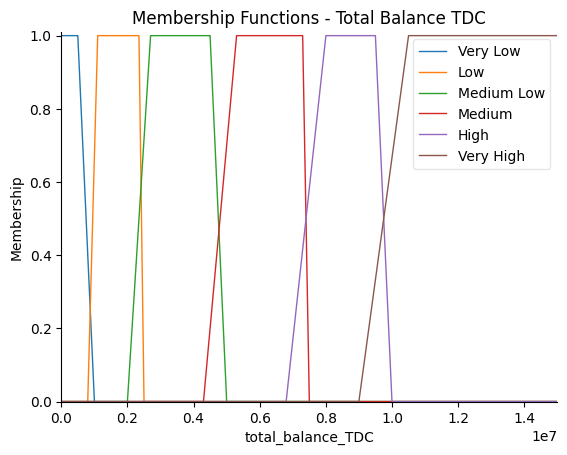

In [6]:
#total_balance_TDC = ctrl.Antecedent(np.linspace(0, 200_000_000, 5000), "total_balance_TDC")
total_balance_TDC = ctrl.Antecedent(np.linspace(0, 15_000_000, 5000), "total_balance_TDC")

total_balance_TDC["Very Low"] = fuzz.trapmf(total_balance_TDC.universe, [0, 0, 500_000, 1_000_000])
total_balance_TDC["Low"] = fuzz.trapmf(total_balance_TDC.universe, [800_000, 1_100_000, 2_350_000, 2_500_000])
total_balance_TDC["Medium Low"] = fuzz.trapmf(total_balance_TDC.universe, [2_000_000, 2_700_000, 4_500_000, 5_000_000])
total_balance_TDC["Medium"] = fuzz.trapmf(total_balance_TDC.universe, [4_300_000, 5_300_000, 7_300_000, 7_500_000])
total_balance_TDC["High"] = fuzz.trapmf(total_balance_TDC.universe, [6_800_000, 8_000_000, 9_500_000, 10_000_000])
total_balance_TDC["Very High"] = fuzz.trapmf(total_balance_TDC.universe, [9_000_000, 10_500_000, 15_000_000, 15_000_000]) # for visualization
#total_balance_TDC["Very High"] = fuzz.trapmf(total_balance_TDC.universe, [9_000_000, 10_500_000, 200_000_000, 200_000_000]) # original range

total_balance_TDC.view()
plt.title("Membership Functions - Total Balance TDC")
plt.show()


$$
\mu_{\text{Very Low}}(x) =
\begin{cases}
  1, & x \leq 500,000 \\
  \frac{1,000,000 - x}{500,000}, & 500,000 \leq x \leq 1,000,000 \\
  0, & x > 1,000,000
\end{cases}
$$

$$
\mu_{\text{Low}}(x) =
\begin{cases}
  0, & x < 800,000 \\
  \frac{x - 800,000}{300,000}, & 800,000 \leq x \leq 1,100,000 \\
  1, & 1,100,000 \leq x \leq 2,350,000 \\
  \frac{2,500,000 - x}{150,000}, & 2,350,000 \leq x \leq 2,500,000 \\
  0, & x > 2,500,000
\end{cases}
$$

$$
\mu_{\text{Medium Low}}(x) =
\begin{cases}
  0, & x < 2,000,000 \\
  \frac{x - 2,000,000}{700,000}, & 2,000,000 \leq x \leq 2,700,000 \\
  1, & 2,700,000 \leq x \leq 4,500,000 \\
  \frac{5,000,000 - x}{500,000}, & 4,500,000 \leq x \leq 5,000,000 \\
  0, & x > 5,000,000
\end{cases}
$$

$$
\mu_{\text{Medium}}(x) =
\begin{cases}
  0, & x < 4,300,000 \\
  \frac{x - 4,300,000}{1,000,000}, & 4,300,000 \leq x \leq 5,300,000 \\
  1, & 5,300,000 \leq x \leq 7,300,000 \\
  \frac{7,500,000 - x}{200,000}, & 7,300,000 \leq x \leq 7,500,000 \\
  0, & x > 7,500,000
\end{cases}
$$

$$
\mu_{\text{High}}(x) =
\begin{cases}
  0, & x < 6,800,000 \\
  \frac{x - 6,800,000}{1,200,000}, & 6,800,000 \leq x \leq 8,000,000 \\
  1, & 8,000,000 \leq x \leq 9,500,000 \\
  \frac{10,000,000 - x}{500,000}, & 9,500,000 \leq x \leq 10,000,000 \\
  0, & x > 10,000,000
\end{cases}
$$

$$
\mu_{\text{Very High}}(x) =
\begin{cases}
  0, & x < 9,000,000 \\
  \frac{x - 9,000,000}{1,500,000}, & 9,000,000 \leq x \leq 10,500,000 \\
  1, & 10,500,000 \leq x \leq 200,000,000 \\
  0, & x > 200,000,000
\end{cases}
$$


### ***Overdue Balance***

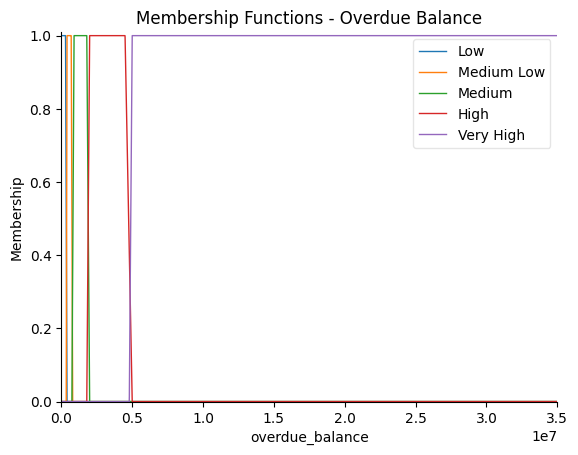

In [7]:
overdue_balance = ctrl.Antecedent(np.linspace(0, 35_000_000, 5000), "overdue_balance")

overdue_balance["Low"] = fuzz.trapmf(overdue_balance.universe, [0, 0, 300_000, 400_000])
overdue_balance["Medium Low"] = fuzz.trapmf(overdue_balance.universe, [350_000, 400_000, 700_000, 800_000])
overdue_balance["Medium"] = fuzz.trapmf(overdue_balance.universe, [750_000, 900_000, 1_800_000, 2_000_000])
overdue_balance["High"] = fuzz.trapmf(overdue_balance.universe, [1_800_000, 2_000_000, 4_500_000, 5_000_000])
overdue_balance["Very High"] = fuzz.trapmf(overdue_balance.universe, [4_800_000, 5_000_000, 35_000_000, 35_000_000])

overdue_balance.view()
plt.title("Membership Functions - Overdue Balance")
plt.show()

$$
\mu_{\text{Low}}(x) =
\begin{cases}
  1, & x \leq 300,000 \\
  \frac{400,000 - x}{100,000}, & 300,000 \leq x \leq 400,000 \\
  0, & x > 400,000
\end{cases}
$$

$$
\mu_{\text{Medium Low}}(x) =
\begin{cases}
  0, & x < 350,000 \\
  \frac{x - 350,000}{50,000}, & 350,000 \leq x \leq 400,000 \\
  1, & 400,000 \leq x \leq 700,000 \\
  \frac{800,000 - x}{100,000}, & 700,000 \leq x \leq 800,000 \\
  0, & x > 800,000
\end{cases}
$$

$$
\mu_{\text{Medium}}(x) =
\begin{cases}
  0, & x < 750,000 \\
  \frac{x - 750,000}{150,000}, & 750,000 \leq x \leq 900,000 \\
  1, & 900,000 \leq x \leq 1,800,000 \\
  \frac{2,000,000 - x}{200,000}, & 1,800,000 \leq x \leq 2,000,000 \\
  0, & x > 2,000,000
\end{cases}
$$

$$
\mu_{\text{High}}(x) =
\begin{cases}
  0, & x < 1,800,000 \\
  \frac{x - 1,800,000}{200,000}, & 1,800,000 \leq x \leq 2,000,000 \\
  1, & 2,000,000 \leq x \leq 4,500,000 \\
  \frac{5,000,000 - x}{500,000}, & 4,500,000 \leq x \leq 5,000,000 \\
  0, & x > 5,000,000
\end{cases}
$$

$$
\mu_{\text{Very High}}(x) =
\begin{cases}
  0, & x < 4,800,000 \\
  \frac{x - 4,800,000}{200,000}, & 4,800,000 \leq x \leq 5,000,000 \\
  1, & 5,000,000 \leq x \leq 35,000,000 \\
  0, & x > 35,000,000
\end{cases}
$$


### ***Overdue Installment***

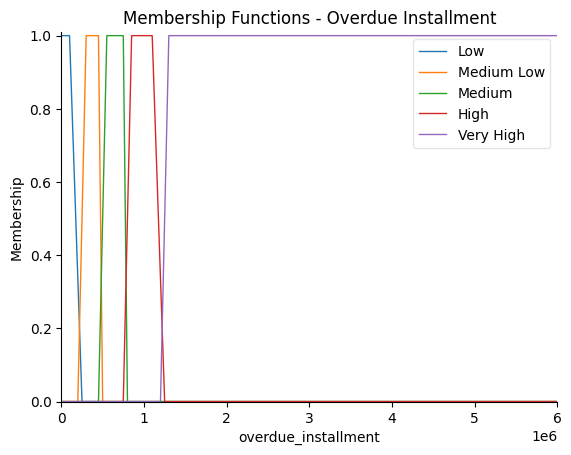

In [8]:
overdue_installment = ctrl.Antecedent(np.linspace(0, 6_000_000, 5000), "overdue_installment")

overdue_installment["Low"] = fuzz.trapmf(overdue_installment.universe, [0, 0, 100_000, 250_000])
overdue_installment["Medium Low"] = fuzz.trapmf(overdue_installment.universe, [200_000, 300_000, 450_000, 500_000])
overdue_installment["Medium"] = fuzz.trapmf(overdue_installment.universe, [450_000, 550_000, 750_000, 800_000])
overdue_installment["High"] = fuzz.trapmf(overdue_installment.universe, [750_000, 850_000, 1_100_000, 1_250_000])
overdue_installment["Very High"] = fuzz.trapmf(overdue_installment.universe, [1_200_000, 1_300_000, 6_000_000, 6_000_000])

overdue_installment.view()
plt.title("Membership Functions - Overdue Installment")
plt.show()

$$
\mu_{\text{Low}}(x) =
\begin{cases}
  1, & x \leq 100,000 \\
  \frac{250,000 - x}{150,000}, & 100,000 \leq x \leq 250,000 \\
  0, & x > 250,000
\end{cases}
$$

$$
\mu_{\text{Medium Low}}(x) =
\begin{cases}
  0, & x < 200,000 \\
  \frac{x - 200,000}{100,000}, & 200,000 \leq x \leq 300,000 \\
  1, & 300,000 \leq x \leq 450,000 \\
  \frac{500,000 - x}{50,000}, & 450,000 \leq x \leq 500,000 \\
  0, & x > 500,000
\end{cases}
$$

$$
\mu_{\text{Medium}}(x) =
\begin{cases}
  0, & x < 450,000 \\
  \frac{x - 450,000}{100,000}, & 450,000 \leq x \leq 550,000 \\
  1, & 550,000 \leq x \leq 750,000 \\
  \frac{800,000 - x}{50,000}, & 750,000 \leq x \leq 800,000 \\
  0, & x > 800,000
\end{cases}
$$

$$
\mu_{\text{High}}(x) =
\begin{cases}
  0, & x < 750,000 \\
  \frac{x - 750,000}{100,000}, & 750,000 \leq x \leq 850,000 \\
  1, & 850,000 \leq x \leq 1,100,000 \\
  \frac{1,250,000 - x}{150,000}, & 1,100,000 \leq x \leq 1,250,000 \\
  0, & x > 1,250,000
\end{cases}
$$

$$
\mu_{\text{Very High}}(x) =
\begin{cases}
  0, & x < 1,200,000 \\
  \frac{x - 1,200,000}{100,000}, & 1,200,000 \leq x \leq 1,300,000 \\
  1, & 1,300,000 \leq x \leq 6,000,000 \\
  0, & x > 6,000,000
\end{cases}
$$

### ***Priorización***

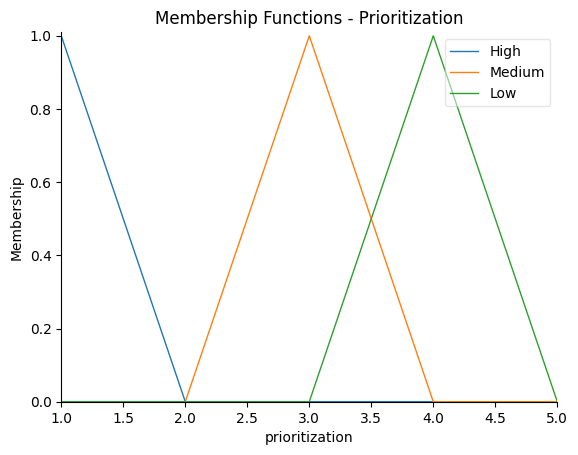

In [9]:
prioritization = ctrl.Antecedent(np.arange(1, 6, 1), "prioritization")

prioritization["High"] = fuzz.trimf(prioritization.universe, [1, 1, 2])
prioritization["Medium"] = fuzz.trimf(prioritization.universe, [2, 3, 4])
prioritization["Low"] = fuzz.trimf(prioritization.universe, [3, 4, 5])

prioritization.view()
plt.title("Membership Functions - Prioritization")
plt.show()

$$
\mu_{\text{Low}}(x) =
\begin{cases}
  1, & x = 1 \\
  \frac{2 - x}{1}, & 1 \leq x \leq 2 \\
  0, & x > 2
\end{cases}
$$

$$
\mu_{\text{Medium}}(x) =
\begin{cases}
  0, & x < 2 \\
  \frac{x - 2}{1}, & 2 \leq x \leq 3 \\
  1, & x = 3 \\
  \frac{4 - x}{1}, & 3 \leq x \leq 4 \\
  0, & x > 4
\end{cases}
$$

$$
\mu_{\text{High}}(x) =
\begin{cases}
  0, & x < 3 \\
  \frac{x - 3}{1}, & 3 \leq x \leq 4 \\
  1, & x = 4 \\
  \frac{5 - x}{1}, & 4 \leq x \leq 5 \\
  0, & x > 5
\end{cases}
$$

### ***Payment Habit***

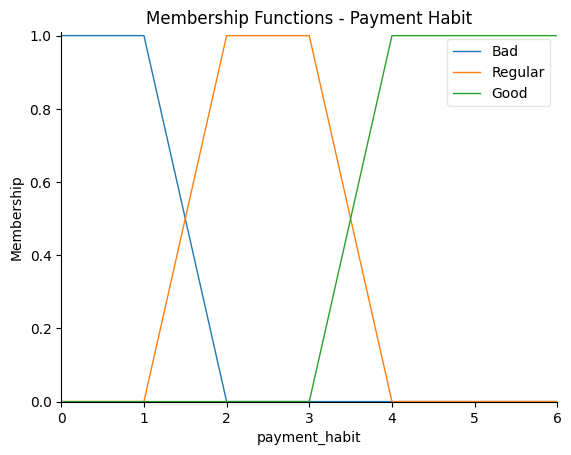

In [10]:
payment_habit = ctrl.Antecedent(np.arange(0, 7, 1), "payment_habit")

payment_habit["Bad"] = fuzz.trapmf(payment_habit.universe, [0, 0, 1, 2])
payment_habit["Regular"] = fuzz.trapmf(payment_habit.universe, [1, 2, 3, 4])
payment_habit["Good"] = fuzz.trapmf(payment_habit.universe, [3, 4, 6, 6])

payment_habit.view()
plt.title("Membership Functions - Payment Habit")
plt.show()

$$
\mu_{\text{Bad}}(x) =
\begin{cases}
  1, & x \leq 0 \\
  \frac{x - 0}{1}, & 0 \leq x \leq 1 \\
  1, & 1 \leq x \leq 2 \\
  \frac{2 - x}{1}, & 2 \leq x \leq 3 \\
  0, & x > 3
\end{cases}
$$

$$
\mu_{\text{Regular}}(x) =
\begin{cases}
  0, & x < 1 \\
  \frac{x - 1}{1}, & 1 \leq x \leq 2 \\
  1, & 2 \leq x \leq 3 \\
  \frac{4 - x}{1}, & 3 \leq x \leq 4 \\
  0, & x > 4
\end{cases}
$$

$$
\mu_{\text{Good}}(x) =
\begin{cases}
  0, & x < 3 \\
  \frac{x - 3}{1}, & 3 \leq x \leq 4 \\
  1, & 4 \leq x \leq 6 \\
  0, & x > 6
\end{cases}
$$


### ***Total Contacts***

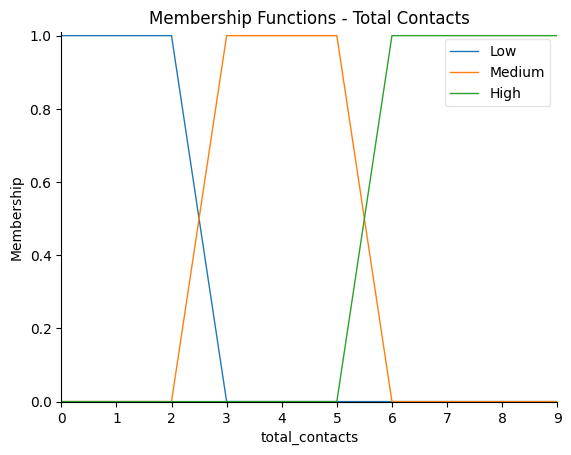

In [11]:
total_contacts = ctrl.Antecedent(np.arange(0, 10, 1), "total_contacts")

total_contacts["Low"] = fuzz.trapmf(total_contacts.universe, [0, 0, 2, 3])
total_contacts["Medium"] = fuzz.trapmf(total_contacts.universe, [2, 3, 5, 6])
total_contacts["High"] = fuzz.trapmf(total_contacts.universe, [5, 6, 10, 10])

total_contacts.view()
plt.title("Membership Functions - Total Contacts")
plt.show()

$$
\mu_{\text{Low}}(x) =
\begin{cases}
  1, & x \leq 0 \\
  \frac{x - 0}{2}, & 0 \leq x \leq 2 \\
  1, & 2 \leq x \leq 3 \\
  \frac{3 - x}{1}, & 3 \leq x \leq 4 \\
  0, & x > 4
\end{cases}
$$

$$
\mu_{\text{Medium}}(x) =
\begin{cases}
  0, & x < 2 \\
  \frac{x - 2}{1}, & 2 \leq x \leq 3 \\
  1, & 3 \leq x \leq 5 \\
  \frac{6 - x}{1}, & 5 \leq x \leq 6 \\
  0, & x > 6
\end{cases}
$$

$$
\mu_{\text{High}}(x) =
\begin{cases}
  0, & x < 5 \\
  \frac{x - 5}{1}, & 5 \leq x \leq 6 \\
  1, & 6 \leq x \leq 10 \\
  0, & x > 10
\end{cases}
$$

### ***Total Agreements***

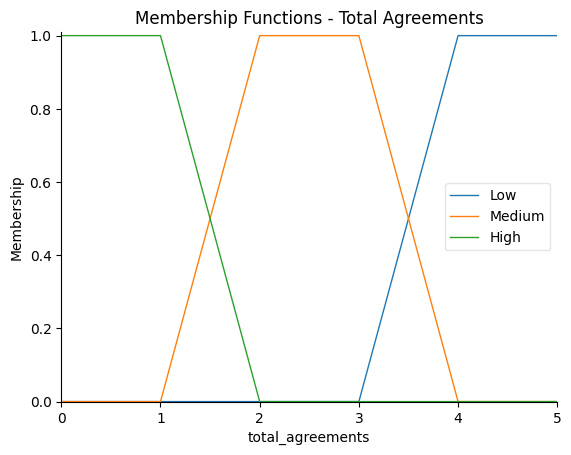

In [12]:
total_agreements = ctrl.Antecedent(np.arange(0, 6, 1), "total_agreements")

total_agreements["Low"] = fuzz.trapmf(total_agreements.universe, [3, 4, 6, 6])
total_agreements["Medium"] = fuzz.trapmf(total_agreements.universe, [2, 2, 3, 4])
total_agreements["High"] = fuzz.trapmf(total_agreements.universe, [0, 0, 1, 2])

total_agreements.view()
plt.title("Membership Functions - Total Agreements")
plt.show()

$$
\mu_{\text{Low}}(x) =
\begin{cases}
  0, & x < 3 \\
  \frac{x - 3}{1}, & 3 \leq x \leq 4 \\
  1, & 4 \leq x \leq 6 \\
  0, & x > 6
\end{cases}
$$

$$
\mu_{\text{Medium}}(x) =
\begin{cases}
  0, & x < 2 \\
  1, & 2 \leq x \leq 3 \\
  \frac{4 - x}{1}, & 3 \leq x \leq 4 \\
  0, & x > 4
\end{cases}
$$

$$
\mu_{\text{High}}(x) =
\begin{cases}
  1, & x \leq 0 \\
  \frac{x - 0}{1}, & 0 \leq x \leq 1 \\
  1, & 1 \leq x \leq 2 \\
  0, & x > 2
\end{cases}
$$


## ***Client Risk***

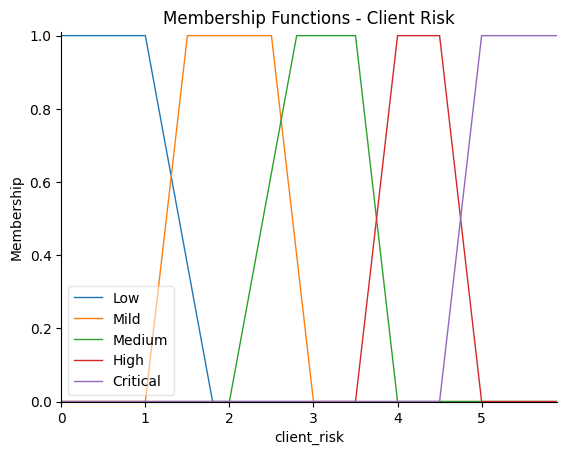

In [13]:
client_risk = ctrl.Consequent(np.arange(0, 6, 0.1), "client_risk")

client_risk["Low"] = fuzz.trapmf(client_risk.universe, [0, 0, 1, 1.8])
client_risk["Mild"] = fuzz.trapmf(client_risk.universe, [1, 1.5, 2.5, 3])
client_risk["Medium"] = fuzz.trapmf(client_risk.universe, [2, 2.8, 3.5, 4])
client_risk["High"] = fuzz.trapmf(client_risk.universe, [3.5, 4, 4.5, 5])
client_risk["Critical"] = fuzz.trapmf(client_risk.universe, [4.5, 5, 6, 6])

client_risk.view()
plt.title("Membership Functions - Client Risk")
plt.show()

## ***Rule Definition***

In [14]:
# Rules
rules = [
    ctrl.Rule(risk["Low"] & (a_days["Low"] | a_days["Medium"]), client_risk["Low"]),
    ctrl.Rule(risk["Low"] & (overdue_installment["Low"] | overdue_installment["Medium Low"]), client_risk["Low"]),
    ctrl.Rule(risk["Low"] & payment_habit["Good"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & (overdue_balance["Low"] | overdue_balance["Medium Low"]), client_risk["Low"]),
    ctrl.Rule(risk["Low"] & total_contacts["Low"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & total_balance_TDC["Low"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & total_balance_CDC["Low"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & prioritization["High"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & total_agreements["High"], client_risk["Low"]),

    ctrl.Rule(risk["Low"] & total_balance_CDC["Medium Low"] & overdue_installment["Low"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & total_balance_TDC["Medium"] & overdue_installment["Low"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & prioritization["High"] & total_contacts["Low"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & (total_contacts["Low"] | total_agreements["High"]) & prioritization["Medium"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & overdue_balance["Medium Low"] & a_days["Medium"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & total_balance_TDC["Very High"] & total_balance_CDC["Very High"] & prioritization["High"], client_risk["Low"]),

    ctrl.Rule(risk["Low"] & a_days["Low"] & overdue_installment["Low"] & payment_habit["Good"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & (overdue_balance["Low"] | overdue_installment["Low"]) & total_agreements["High"] & prioritization["Medium"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & total_balance_CDC["Medium"] & total_contacts["Low"] & payment_habit["Good"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & a_days["Medium"] & overdue_installment["Low"] & prioritization["High"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & overdue_balance["Medium Low"] & total_contacts["Low"] & payment_habit["Good"], client_risk["Low"]),

    ctrl.Rule(risk["Low"] & a_days["Medium"] & (total_contacts["Low"] | total_agreements["High"]) & overdue_installment["Low"] & prioritization["High"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & overdue_balance["Medium Low"] & a_days["Medium"] & prioritization["High"] & payment_habit["Good"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & overdue_installment["Low"] & total_contacts["Low"] & prioritization["Medium"] & total_balance_TDC["Medium Low"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & payment_habit["Good"] & a_days["Low"] & total_agreements["High"] & overdue_installment["Low"], client_risk["Low"]),
    ctrl.Rule(risk["Low"] & prioritization["High"] & overdue_balance["Medium Low"] & overdue_installment["Low"] & total_contacts["Low"], client_risk["Low"]),
#
    ctrl.Rule(risk["Medium"] & a_days["Low"], client_risk["Mild"]),
    ctrl.Rule(risk["Low"] & overdue_installment["Medium"], client_risk["Mild"]),
    ctrl.Rule(risk["Low"] & total_contacts["Medium"], client_risk["Mild"]),
    ctrl.Rule(risk["Medium"] & prioritization["High"], client_risk["Mild"]),
    ctrl.Rule(risk["Medium"] & a_days["Medium"] & total_balance_TDC["Medium Low"], client_risk["Mild"]),
    ctrl.Rule(risk["Medium"] & a_days["Medium"] & total_balance_CDC["Medium Low"], client_risk["Mild"]),
    
    ctrl.Rule(risk["Low"] & overdue_installment["Medium"] & prioritization["High"], client_risk["Mild"]),
    ctrl.Rule(risk["Medium"] & total_balance_CDC["Medium Low"] & total_contacts["Medium"], client_risk["Mild"]),
    ctrl.Rule(risk["Medium"] & total_balance_TDC["Medium Low"] & total_contacts["Medium"], client_risk["Mild"]),
    ctrl.Rule(risk["Low"] & a_days["Low"] & total_agreements["High"], client_risk["Mild"]),
    ctrl.Rule(risk["Medium"] & overdue_installment["Medium"] & a_days["Medium-High"], client_risk["Mild"]),
    ctrl.Rule(risk["Low"] & total_balance_TDC["Medium"] & prioritization["Medium"], client_risk["Mild"]),
    ctrl.Rule(risk["Low"] & total_balance_CDC["Medium"] & prioritization["Medium"], client_risk["Mild"]),
    
    ctrl.Rule(risk["Medium"] & total_balance_CDC["Medium Low"] & overdue_installment["Medium"] & prioritization["High"], client_risk["Mild"]),
    ctrl.Rule(risk["Medium"] & total_balance_TDC["Medium Low"] & overdue_installment["Medium"] & prioritization["High"], client_risk["Mild"]),
    ctrl.Rule(risk["Low"] & a_days["Medium"] & total_contacts["Low"] & total_balance_TDC["Low"], client_risk["Mild"]),
    ctrl.Rule(risk["Low"] & a_days["Medium"] & total_contacts["Low"] & total_balance_CDC["Low"], client_risk["Mild"]),
    ctrl.Rule(risk["Medium"] & a_days["Low"] & prioritization["Medium"] & overdue_installment["Medium"], client_risk["Mild"]),
    ctrl.Rule(risk["Low"] & total_balance_CDC["Medium Low"] & total_contacts["Medium"] & prioritization["High"], client_risk["Mild"]),
    ctrl.Rule(risk["Low"] & total_balance_TDC["Medium Low"] & total_contacts["Medium"] & prioritization["High"], client_risk["Mild"]),
    ctrl.Rule(risk["Medium"] & overdue_installment["Low"] & total_agreements["Medium"] & a_days["Low"], client_risk["Mild"]),
    
    ctrl.Rule(risk["Medium"] & total_balance_TDC["Medium Low"] & overdue_installment["Medium"] & total_contacts["Medium"] & prioritization["High"], client_risk["Mild"]),
    ctrl.Rule(risk["Medium"] & total_balance_CDC["Medium Low"] & overdue_installment["Medium"] & total_contacts["Medium"] & prioritization["High"], client_risk["Mild"]),
    ctrl.Rule(risk["Low"] & a_days["Medium-High"] & overdue_installment["Medium"] & total_balance_CDC["Medium"] & prioritization["Medium"], client_risk["Mild"]),
    ctrl.Rule(risk["Low"] & a_days["Medium-High"] & overdue_installment["Medium"] & total_balance_TDC["Medium"] & prioritization["Medium"], client_risk["Mild"]),
    ctrl.Rule(risk["Medium"] & total_agreements["High"] & a_days["Low"] & total_balance_TDC["Low"] & overdue_installment["Medium"], client_risk["Mild"]),
    ctrl.Rule(risk["Medium"] & total_agreements["High"] & a_days["Low"] & total_balance_CDC["Low"] & overdue_installment["Medium"], client_risk["Mild"]),
    ctrl.Rule(risk["Low"] & overdue_installment["Medium"] & a_days["Medium-High"] & total_contacts["Low"] & prioritization["High"], client_risk["Mild"]),
    ctrl.Rule(risk["Medium"] & a_days["Medium-High"] & total_contacts["Medium"] & total_balance_CDC["Medium Low"] & overdue_installment["Medium"], client_risk["Mild"]),
    ctrl.Rule(risk["Medium"] & a_days["Medium-High"] & total_contacts["Medium"] & total_balance_TDC["Medium Low"] & overdue_installment["Medium"], client_risk["Mild"]),
#
    ctrl.Rule(risk["Medium"] & total_balance_TDC["Medium"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_CDC["Medium"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & a_days["Medium"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & prioritization["Low"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_CDC["Medium"] & a_days["Medium"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_TDC["Medium"] & a_days["Medium"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_contacts["High"] & a_days["Medium"], client_risk["Medium"]),

    ctrl.Rule(risk["Medium"] & total_balance_TDC["Medium"] & a_days["Medium"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_CDC["Medium"] & a_days["Medium"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_contacts["High"] & (a_days["Medium"] | a_days["Medium-High"]), client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_CDC["Medium Low"] & a_days["Medium"] & prioritization["Low"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_TDC["Medium Low"] & a_days["Medium"] & prioritization["Low"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_TDC["High"] & a_days["High"] & total_agreements["Medium"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_CDC["High"] & a_days["High"] & total_agreements["Medium"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & prioritization["Medium"] & total_agreements["High"], client_risk["Medium"]),

    ctrl.Rule(risk["Medium"] & total_balance_CDC["Medium Low"] & a_days["Medium"] & prioritization["Low"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_TDC["Medium Low"] & a_days["Medium"] & prioritization["Low"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_TDC["High"] & a_days["Medium-High"] & total_agreements["Medium"] & prioritization["Medium"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_CDC["High"] & a_days["Medium-High"] & total_agreements["Medium"] & prioritization["Medium"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_contacts["High"] & a_days["Medium-High"] & total_agreements["Low"] & prioritization["Low"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_CDC["Medium"] & a_days["High"] & total_agreements["Low"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_TDC["Medium"] & a_days["High"] & total_agreements["Low"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_TDC["Medium"] & a_days["Medium"] & prioritization["Low"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_CDC["Medium"] & a_days["Medium"] & prioritization["Low"], client_risk["Medium"]),

    ctrl.Rule(risk["Medium"] & total_balance_CDC["Medium Low"] & a_days["Medium"] & total_contacts["High"] & prioritization["Low"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_TDC["Medium Low"] & a_days["Medium"] & total_contacts["High"] & prioritization["Low"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_TDC["High"] & a_days["Medium-High"] & total_agreements["Medium"] & total_contacts["Medium"] & prioritization["Low"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_CDC["High"] & a_days["Medium-High"] & total_agreements["Medium"] & total_contacts["Medium"] & prioritization["Low"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_CDC["Medium"] & a_days["Medium-High"] & total_contacts["High"] & prioritization["Medium"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_TDC["Medium"] & a_days["Medium-High"] & total_contacts["High"] & prioritization["Medium"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_TDC["Medium Low"] & a_days["Medium"] & total_agreements["Low"] & total_contacts["High"] & prioritization["Low"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_CDC["Medium Low"] & a_days["Medium"] & total_agreements["Low"] & total_contacts["High"] & prioritization["Low"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_TDC["High"] & a_days["Medium-High"] & total_agreements["Low"] & prioritization["Low"], client_risk["Medium"]),
    ctrl.Rule(risk["Medium"] & total_balance_CDC["High"] & a_days["Medium-High"] & total_agreements["Low"] & prioritization["Low"], client_risk["Medium"]),

#
    ctrl.Rule(risk["Medium"] & a_days["Medium-High"], client_risk["High"]),
    ctrl.Rule(risk["High"] & overdue_balance["Medium"], client_risk["High"]),
    ctrl.Rule(risk["High"] & a_days["High"] & overdue_installment["Medium"], client_risk["High"]),
    ctrl.Rule(risk["Medium"] & total_balance_CDC["High"] & prioritization["Low"], client_risk["High"]),
    ctrl.Rule(risk["Medium"] & total_balance_TDC["High"] & prioritization["Low"], client_risk["High"]),
    ctrl.Rule(risk["High"] & total_contacts["High"] & overdue_balance["Medium"], client_risk["High"]),
    
    ctrl.Rule(risk["Medium"] & total_balance_TDC["Medium"] & a_days["Medium-High"], client_risk["High"]),
    ctrl.Rule(risk["Medium"] & total_balance_CDC["Medium"] & a_days["Medium-High"], client_risk["High"]),
    ctrl.Rule(risk["High"] & overdue_balance["Medium Low"] & overdue_installment["Medium"], client_risk["High"]),
    ctrl.Rule(risk["High"] & a_days["High"] & prioritization["Medium"] & total_contacts["High"], client_risk["High"]),
    ctrl.Rule(risk["High"] & total_balance_CDC["High"] & overdue_balance["High"] & total_agreements["Medium"], client_risk["High"]),
    ctrl.Rule(risk["High"] & total_balance_TDC["High"] & overdue_balance["High"] & total_agreements["Medium"], client_risk["High"]),
    ctrl.Rule(risk["High"] & a_days["Medium-High"] & prioritization["Low"] & overdue_installment["Medium Low"], client_risk["High"]),

    ctrl.Rule(risk["Medium"] & total_balance_TDC["Medium Low"] & a_days["High"] & overdue_installment["Medium"], client_risk["High"]),
    ctrl.Rule(risk["Medium"] & total_balance_CDC["Medium Low"] & a_days["High"] & overdue_installment["Medium"], client_risk["High"]),
    ctrl.Rule(risk["High"] & overdue_balance["Medium Low"] & prioritization["Medium"] & total_contacts["High"], client_risk["High"]),
    ctrl.Rule(risk["High"] & a_days["High"] & total_balance_CDC["High"] & total_agreements["Medium"] & overdue_installment["Medium"], client_risk["High"]),
    ctrl.Rule(risk["High"] & a_days["High"] & total_balance_TDC["High"] & total_agreements["Medium"] & overdue_installment["Medium"], client_risk["High"]),
    ctrl.Rule(risk["High"] & total_balance_CDC["High"] & overdue_balance["High"] & prioritization["Low"] & a_days["Medium-High"], client_risk["High"]),
    ctrl.Rule(risk["High"] & total_balance_TDC["High"] & overdue_balance["High"] & prioritization["Low"] & a_days["Medium-High"], client_risk["High"]),
    ctrl.Rule(risk["High"] & total_contacts["High"] & total_agreements["Low"] & total_balance_TDC["Medium"] & prioritization["Medium"], client_risk["High"]),
    ctrl.Rule(risk["High"] & total_contacts["High"] & total_agreements["Low"] & total_balance_CDC["Medium"] & prioritization["Medium"], client_risk["High"]),

    ctrl.Rule(risk["Medium"] & a_days["High"] & overdue_balance["Medium Low"] & prioritization["Low"] & overdue_installment["Medium"], client_risk["High"]),
    ctrl.Rule(risk["High"] & total_balance_CDC["Medium"] & overdue_balance["Medium Low"] & a_days["Medium-High"] & total_contacts["High"], client_risk["High"]),
    ctrl.Rule(risk["High"] & total_balance_TDC["Medium"] & overdue_balance["Medium Low"] & a_days["Medium-High"] & total_contacts["High"], client_risk["High"]),
    ctrl.Rule(risk["High"] & total_balance_CDC["High"] & overdue_balance["High"] & a_days["High"] & overdue_installment["Medium"] & prioritization["Medium"], client_risk["High"]),
    ctrl.Rule(risk["High"] & total_balance_TDC["High"] & overdue_balance["High"] & a_days["High"] & overdue_installment["Medium"] & prioritization["Medium"], client_risk["High"]),
    ctrl.Rule(risk["High"] & total_contacts["High"] & total_agreements["Low"] & total_balance_TDC["Medium Low"] & a_days["Medium-High"] & prioritization["Low"], client_risk["High"]),
    ctrl.Rule(risk["High"] & total_contacts["High"] & total_agreements["Low"] & total_balance_CDC["Medium Low"] & a_days["Medium-High"] & prioritization["Low"], client_risk["High"]),
    ctrl.Rule(risk["Medium"] & a_days["Medium-High"] & overdue_balance["Medium"] & overdue_installment["Medium Low"] & total_agreements["Medium"], client_risk["High"]),
#

    ctrl.Rule(risk["High"] & a_days["Very High"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & overdue_balance["Very High"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & prioritization["Low"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & a_days["Very High"] & overdue_installment["Very High"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & total_balance_CDC["Very High"] & overdue_balance["Very High"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & total_balance_TDC["Very High"] & overdue_balance["Very High"], client_risk["Critical"]),

    ctrl.Rule(risk["High"] & a_days["Very High"] & overdue_installment["Very High"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & prioritization["Low"] & overdue_balance["Very High"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & a_days["Very High"] & total_balance_CDC["Very High"] & overdue_balance["Very High"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & a_days["Very High"] & total_balance_TDC["Very High"] & overdue_balance["Very High"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & total_contacts["High"] & prioritization["Low"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & overdue_installment["Very High"] & total_contacts["High"], client_risk["Critical"]),

    ctrl.Rule(risk["High"] & a_days["Very High"] & prioritization["Low"] & overdue_installment["Very High"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & overdue_balance["Very High"] & overdue_installment["Very High"] & prioritization["Low"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & total_contacts["High"] & total_agreements["High"] & prioritization["Low"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & a_days["Very High"] & overdue_balance["Very High"] & overdue_installment["Very High"] & prioritization["Low"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & a_days["Very High"] & total_contacts["High"] & prioritization["Low"], client_risk["Critical"]),

    ctrl.Rule(risk["High"] & a_days["Very High"] & overdue_balance["Very High"] & overdue_installment["Very High"] & prioritization["Low"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & total_balance_CDC["Very High"] & a_days["Very High"] & overdue_installment["Very High"] & prioritization["Low"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & total_balance_TDC["Very High"] & a_days["Very High"] & overdue_installment["Very High"] & prioritization["Low"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & a_days["Very High"] & overdue_balance["Very High"] & total_contacts["High"] & prioritization["Low"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & total_balance_CDC["Very High"] & total_contacts["High"] & prioritization["Low"] & overdue_installment["Very High"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & total_balance_TDC["Very High"] & total_contacts["High"] & prioritization["Low"] & overdue_installment["Very High"], client_risk["Critical"]),
    ctrl.Rule(risk["High"] & a_days["Very High"] & overdue_balance["Very High"] & total_contacts["High"] & total_agreements["High"], client_risk["Critical"]),
]

control_system = ctrl.ControlSystem(rules)
simulation = ctrl.ControlSystemSimulation(control_system)

In [15]:
print([ant.label for ant in simulation.ctrl.antecedents])

['risk', 'a_days', 'overdue_installment', 'payment_habit', 'overdue_balance', 'total_contacts', 'total_balance_TDC', 'total_balance_CDC', 'prioritization', 'total_agreements']


### ***Simulation***

In [16]:
simulation.input["risk"] = 0.6
simulation.input["a_days"] = 30
simulation.input["overdue_installment"] = 100_000 
simulation.input["payment_habit"] =0
simulation.input["overdue_balance"] = 300_000
simulation.input["total_contacts"] = 0
simulation.input["total_balance_TDC"] = 500_000
simulation.input["total_balance_CDC"] = 500_000
simulation.input["prioritization"] = 4
simulation.input["total_agreements"] =0


In [17]:
simulation.compute()
valor_crisp = simulation.output['client_risk']

grados_pertenencia = {}
for label, membership_function in client_risk.terms.items():
    grados_pertenencia[label] = fuzz.interp_membership(client_risk.universe, membership_function.mf, valor_crisp)

client_risk_ = max(grados_pertenencia, key=grados_pertenencia.get)

print("Defuzzified Crisp Value:", valor_crisp)
print("Membership Degrees:", grados_pertenencia)
print("Customer Profile:", client_risk_)

Defuzzified Crisp Value: 2.4981762917933144
Membership Degrees: {'Low': np.float64(0.0), 'Mild': np.float64(1.0), 'Medium': np.float64(0.622720364741643), 'High': np.float64(0.0), 'Critical': np.float64(0.0)}
Customer Profile: Mild


<Figure size 800x600 with 0 Axes>

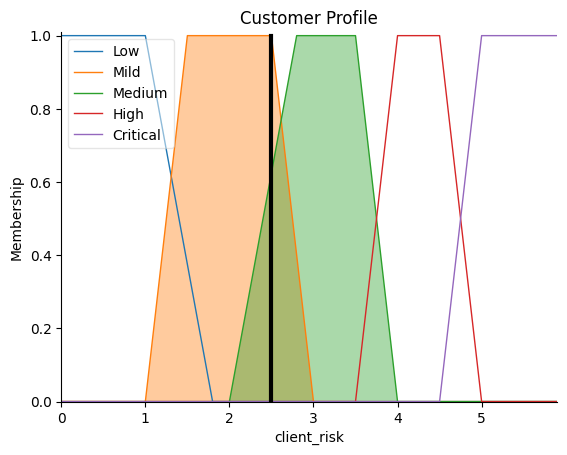

In [18]:
plt.figure(figsize=(8, 6))
client_risk.view(sim=simulation) 
plt.title(f"Customer Profile")
plt.show()

In [19]:
display(f' Method Desfuzify: {client_risk.defuzzify_method}')

' Method Desfuzify: centroid'